Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from sklearn import metrics



Importing the Boston House Price Dataset

In [1]:
from xgboost import XGBRegressor

In [4]:
house_price_data_set=sklearn.datasets.load_boston()
print(house_price_data_set)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/Users/wso2/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [5]:
#Loading the dataset to a Pandas DataFrame
house_price_data_frame= pd.DataFrame(house_price_data_set.data, columns=house_price_data_set.feature_names)

In [6]:
print(house_price_data_frame.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [7]:
#add the target (price) column to the DataFrame
house_price_data_frame['price'] = house_price_data_set.target

In [8]:
house_price_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#checking the number of rows and columns in the data frame
house_price_data_frame.shape

(506, 14)

In [10]:
#check for missing values
house_price_data_frame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [11]:
#statistical measures of the dataset (like mean)
house_price_data_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset
1. Positive Correlation
2. Negative Correlation


In [12]:
#check correlation between every other column values
correlation= house_price_data_frame.corr()

<AxesSubplot:>

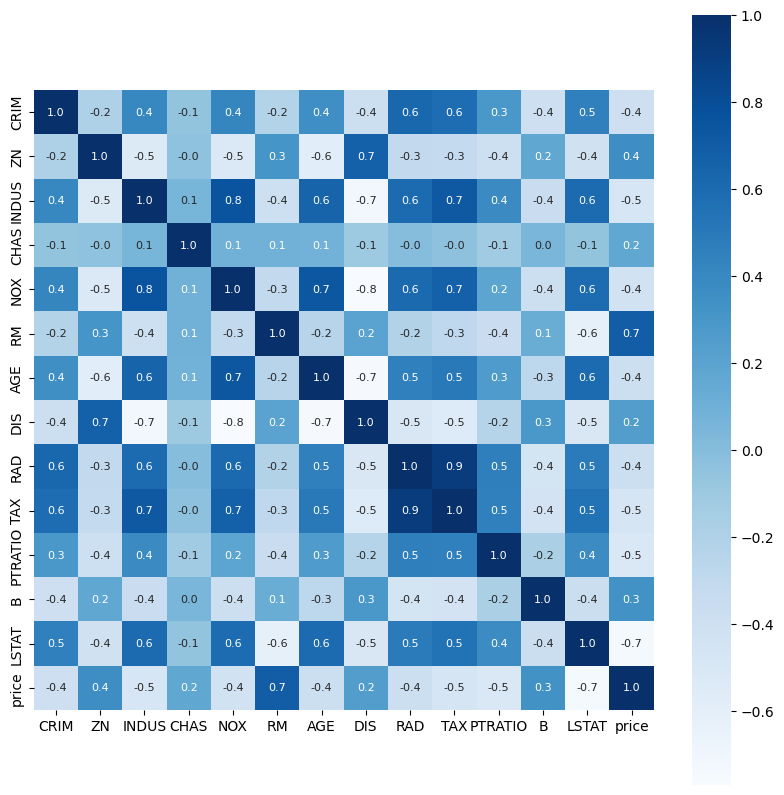

In [15]:
#constructing a heatmap to understand the correlation (here plt means matplotlib.pyplot.. we can use this to get an idea about correlation between elements)
plt.figure(figsize=(10,10))  #size of the chart
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#here plus values means positively correlated negative means negatively correlated in cbar
#here annot_kws is size of the characters
#cmap is the color of the heatmap

Splitting the data and target

In [16]:
X=house_price_data_frame.drop(['price'],axis=1) #if you are dropping a row you have to mention here as axis=0 and if you are dropping a column then have to mention it as axis=1
Y= house_price_data_frame['price']
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

Now splitting data into training data and test data

In [17]:
#Train data is use to train the data, test data is use to evaluate the model
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)
#Here 20 percent of data will be test data and 80% data will be train data
#When using same random state value then the data will be split into same procedure
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Now start Model training

In [18]:
#We use here XGBoost Regression model
#This is incoporating one or two model , this is mainly based on decision tree model
model = XGBRegressor()

#training the model with X_Train and Y_Train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation with the model

In [19]:
#In previous for classification we use accuracy score as the evaluating metrics but we can't use accuracy score for regression problems
 #What in accuracy score does is , it just count the number of correctly predicted values by the model and the original values and then find the difference between both of them
#but we cannot use it in regression model because all these are numerical values
#we can't find accuracy score for regression
#but we can use R_sqaured_errors and 

#Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.